# **Regression Project: Boston House Price Prediction**

# **Marks: 60**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries**

In [ ]:
# Importing libraries for data manipulation
import numpy as np

import pandas as pd

# Importing libraries for data visualization
import seaborn as sns

import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler

# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import skew

import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split


### Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


df = pd.read_csv('/content/drive/MyDrive/Machine Learning Elective Project/Boston.csv')


Mounted at /content/drive


## Data Overview

- Observations
- Sanity checks

In [ ]:
# Checking the first 5 rows of the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**Observations:**

In [ ]:
df.info()
#We make a copy of the dataset that we will use in the scaling step
df1=df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What does the distribution of 'MEDV' look like?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. What are all the inferences that can be found by doing univariate analysis for different variables?
4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

**Exploratoy Data Analysis**

In [ ]:
df.describe(include = "all").T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


**Observations:**
- CRIM: Per capita crime rate by town
  - Around 75% of the crime rate falls between ~0-4 with a max of 88, suggesting an outlier
- ZN: Proportion of residential land zoned for lots over 25,000 sq.ft
  - More than 50% have 0 residential land zone.
- INDUS: Proportion of non-retail business acres per town
  - Ranges from 0.4-27% with an average of 11%, suggesting most towns have some industrial businesses.
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
  - Only ~7% of houses bound the Charles River
- NOX: Nitric Oxide concentration (parts per 10 million)
  - Ranges from 0.38-0.87
- RM: The average number of rooms per dwelling
  - Ranges from 3.5-8.7
- AGE: Proportion of owner-occupied units built before 1940
  - Ranges from 2.9-100y with an average of 68y
- DIS: Weighted distances to five Boston employment centers
  - Ranges form 1.1-12.1 with an average of 3.7
- RAD: Index of accessibility to radial highways
  - Ranges from 1-24 with over 75% being the max 24.
- TAX: Full-value property-tax rate per 10,000 dollars
  - Ranges from 187-711 with and average of 408
- PTRATIO: Pupil-teacher ratio by town
  - Ranges from 12.6-22 with an avergage of 18.4
- LSTAT: % lower status of the population
  - Ranges from 7-37.9% with an average of 12%
- MEDV: Median value of owner-occupied homes in 1000 dollars
  - Ranges from 5k-50k with an average of 22

**Univariate Analysis**

In [ ]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

#Function to check the skewness of a varible
skewness_values = df.apply(skew)

print(skewness_values)

CRIM       5.207652
ZN         2.219063
INDUS      0.294146
CHAS       3.395799
NOX        0.727144
RM         0.402415
AGE       -0.597186
DIS        1.008779
RAD        1.001833
TAX        0.667968
PTRATIO   -0.799945
LSTAT      0.903771
MEDV       1.104811
dtype: float64


**CRIM:**
Per capita crime rate by town

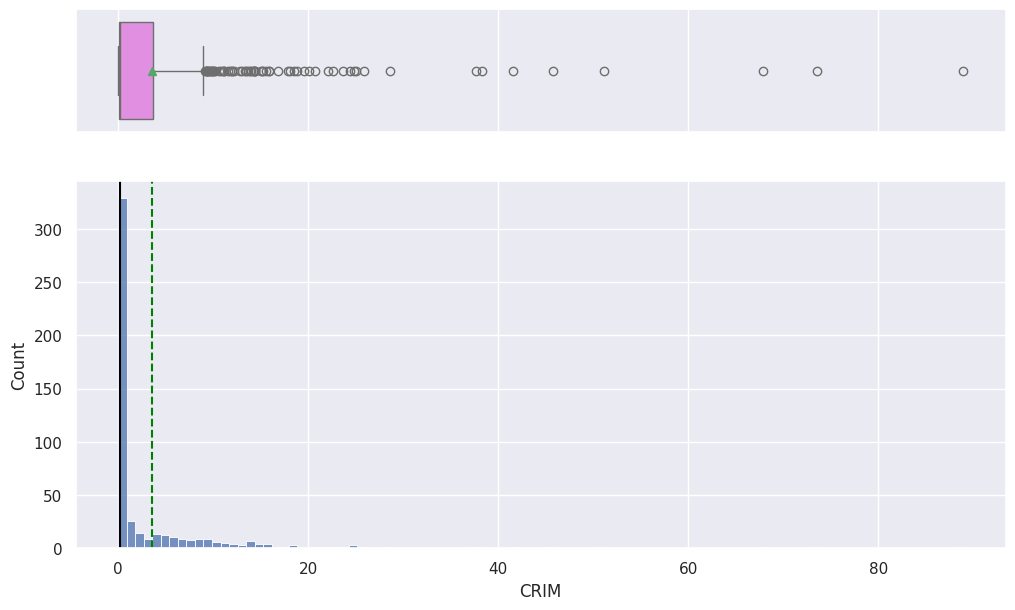

In [ ]:
histogram_boxplot(df, "CRIM")

**Observations:**


*   The data is highly right skewed




**ZN:**
Proportion of residential land zoned for lots over 25,000 sq.ft.

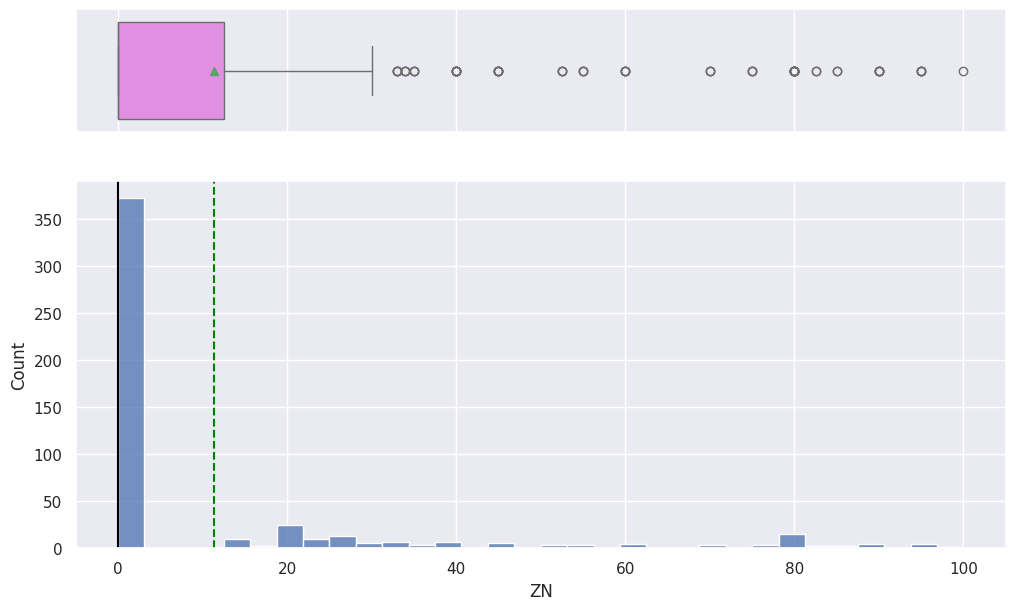

In [ ]:
histogram_boxplot(df, "ZN")

**Observations:**


*   Most of the data has 0 ZN



**INDUS:**
Proportion of non-retail business acres per town

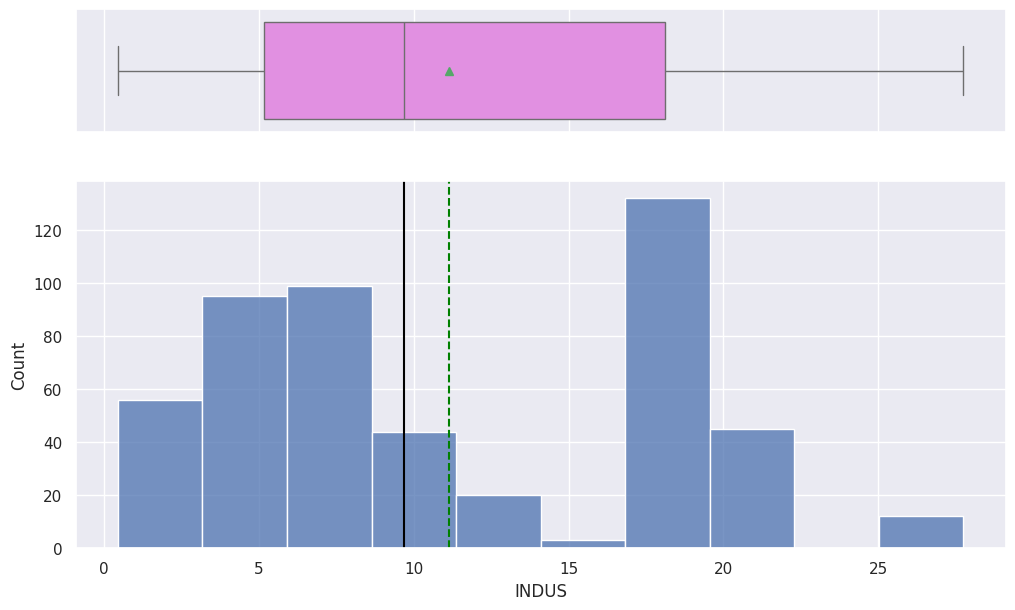

In [ ]:
histogram_boxplot(df, "INDUS")

**Observations:**


*   Peaks at around 17%



**CHAS:**
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)


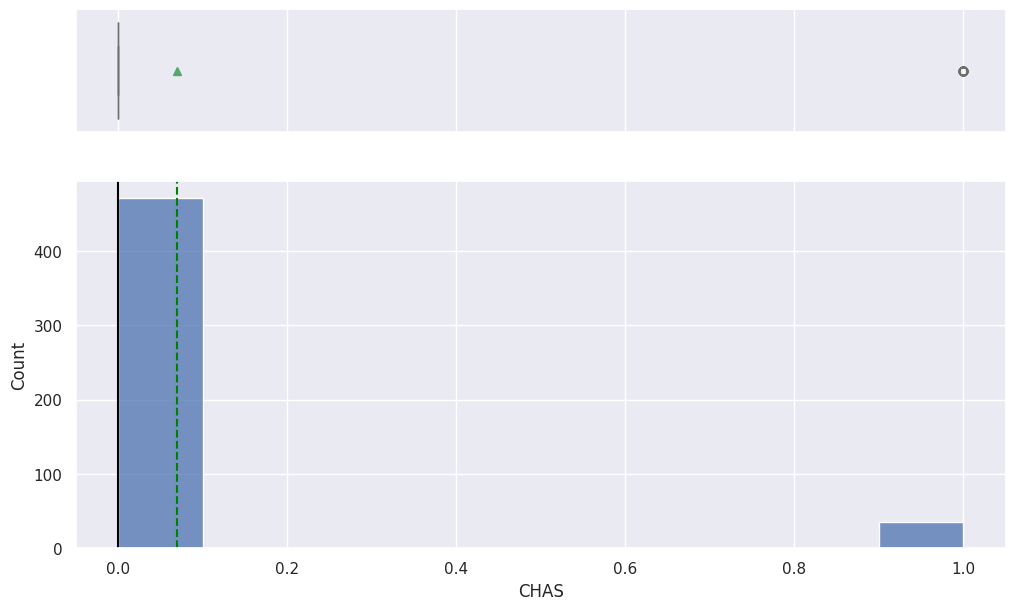

In [ ]:
histogram_boxplot(df, "CHAS")

**Observation:**


*   Few houses have tract bounds river




**NOX:**
Nitric Oxide concentration (parts per 10 million)

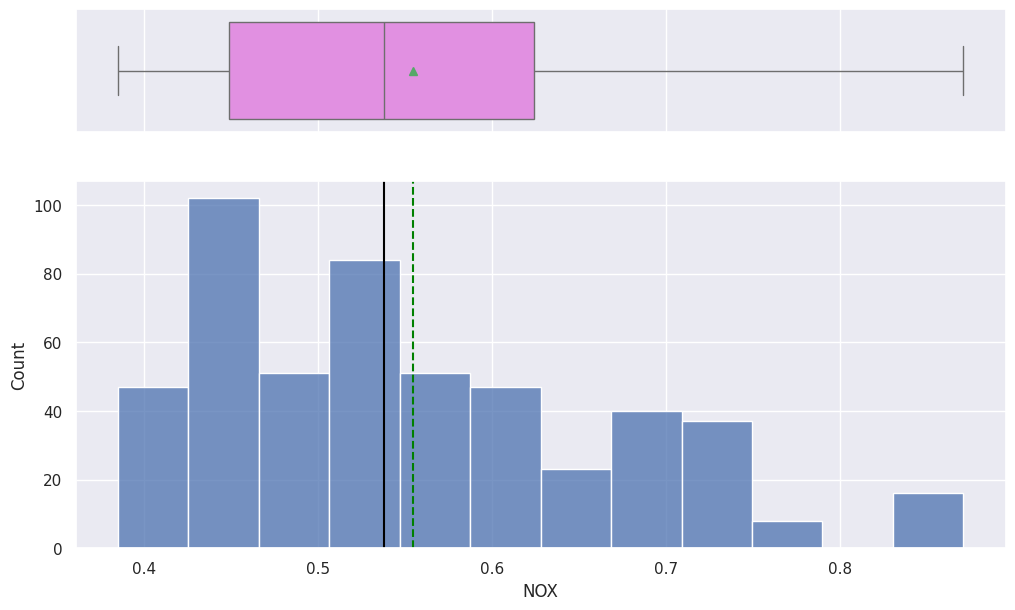

In [ ]:
histogram_boxplot(df, "NOX")

**Observation:**


*   It's right skewed




**RM:**
The average number of rooms per dwelling

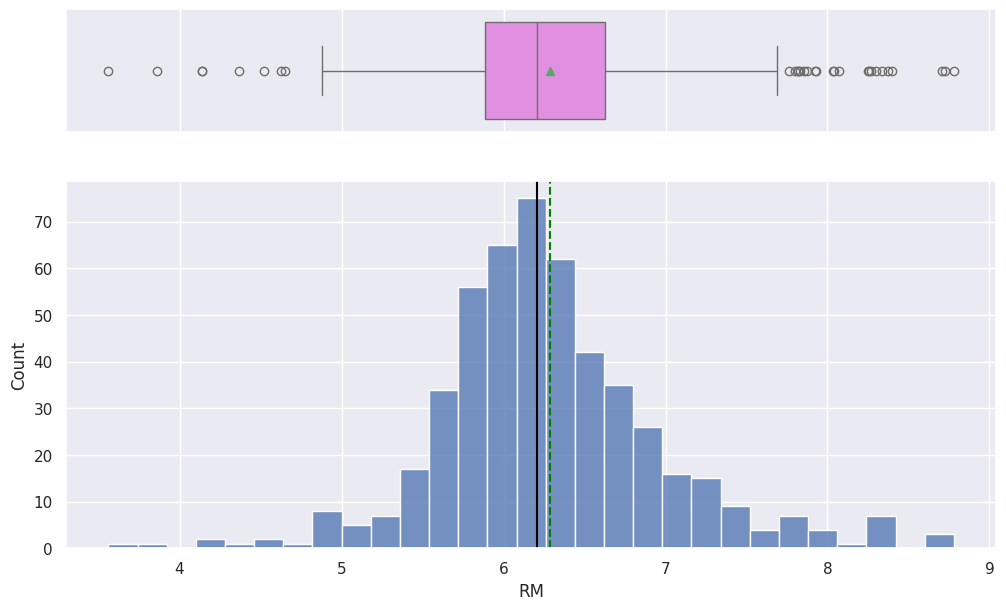

In [ ]:
histogram_boxplot(df, "RM")

**Observations:**


*   Distribution looks relatively normal




**AGE:**
Proportion of owner-occupied units built before 1940

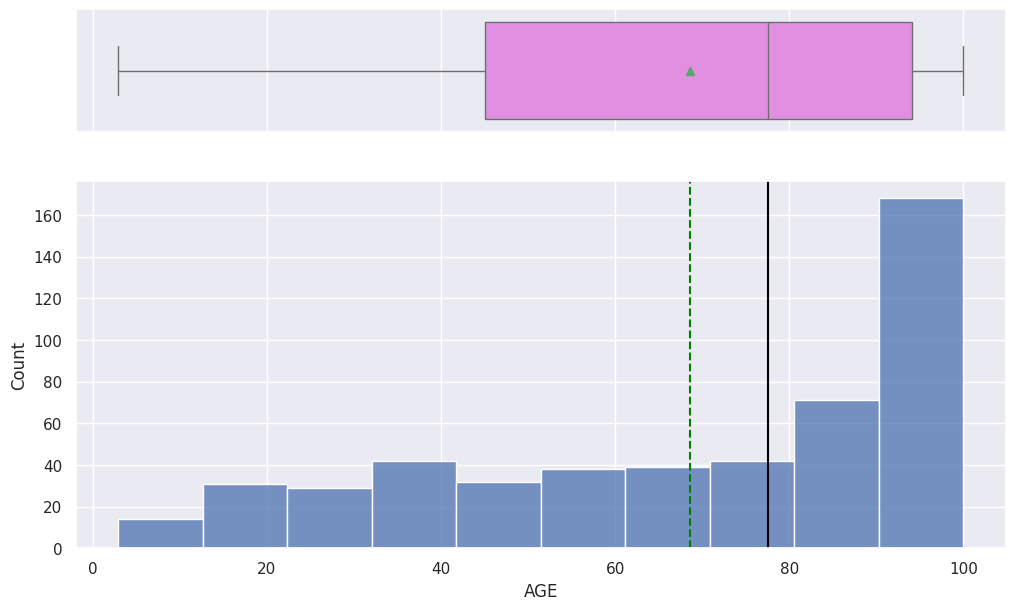

In [ ]:
histogram_boxplot(df, "AGE")

**Observations:**


*   Hightly left skewed



**DIS:**
Weighted distances to five Boston employment centers

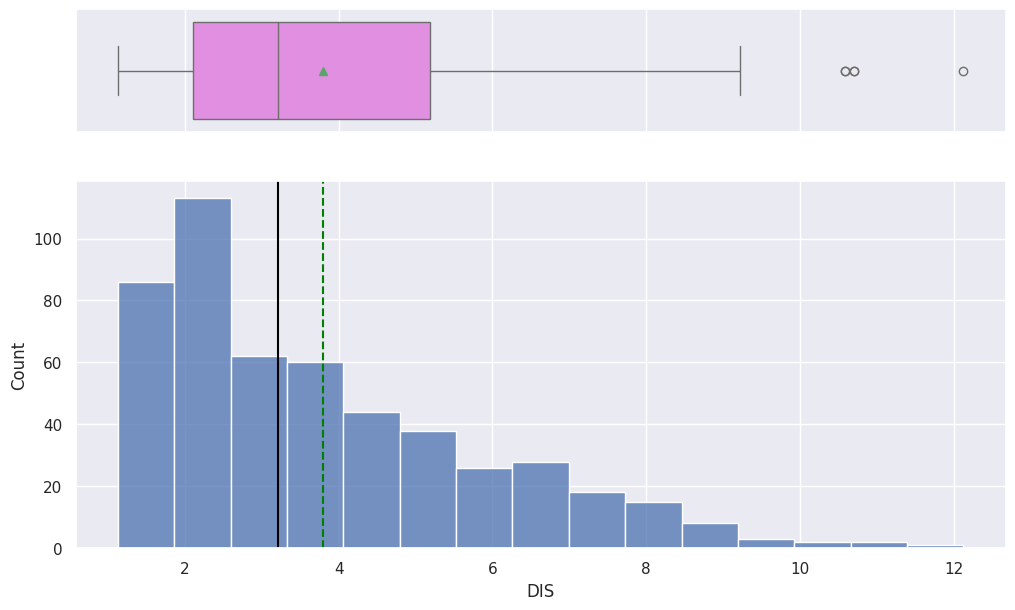

In [ ]:
histogram_boxplot(df, "DIS")

**Observation:**


*   Highly right skewed



**RAD:**
Index of accessibility to radial highways

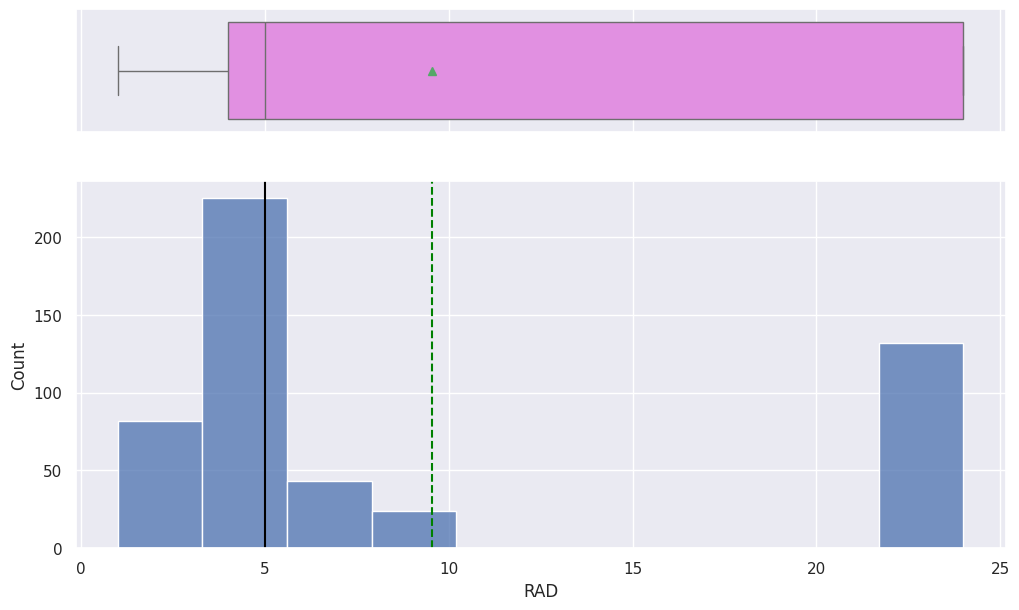

In [ ]:
histogram_boxplot(df, "RAD")

**Observation:**
- Peaks at 5, with an average of 10

**TAX:**
Full-value property-tax rate per 10,000 dollars

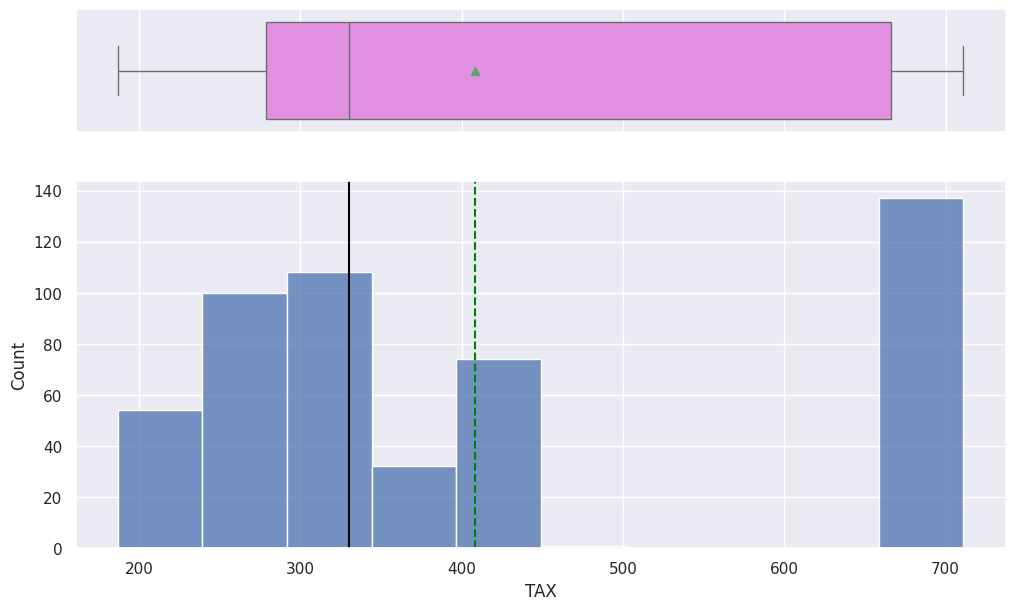

In [ ]:
histogram_boxplot(df, "TAX")

**Observation:**

**PTRATIO:**
Pupil-teacher ratio by town

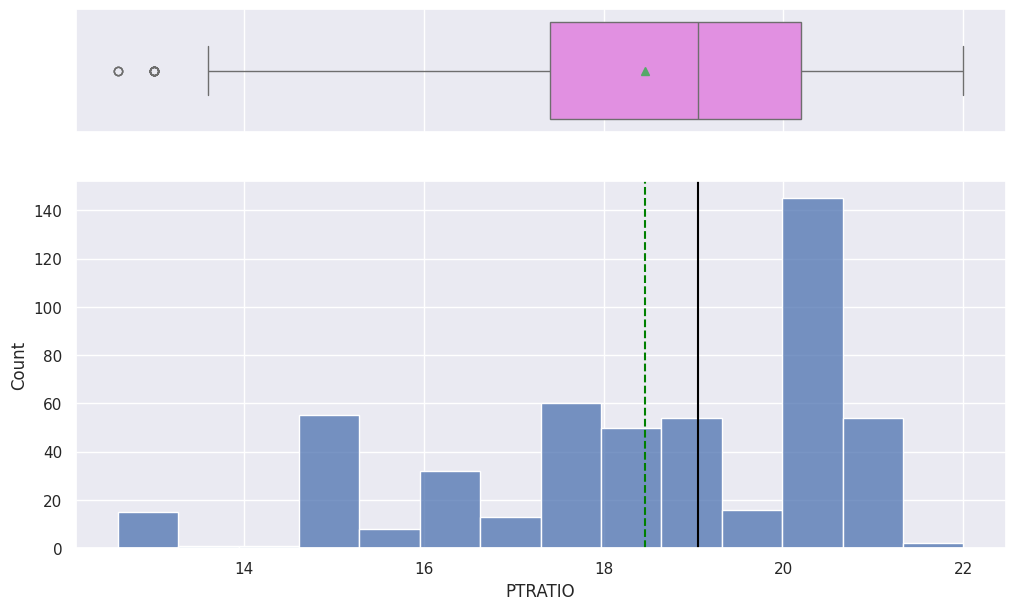

In [ ]:
histogram_boxplot(df, "PTRATIO")

**Observation:**


*   Data is left skewed



**LSTAT:**
% lower status of the population

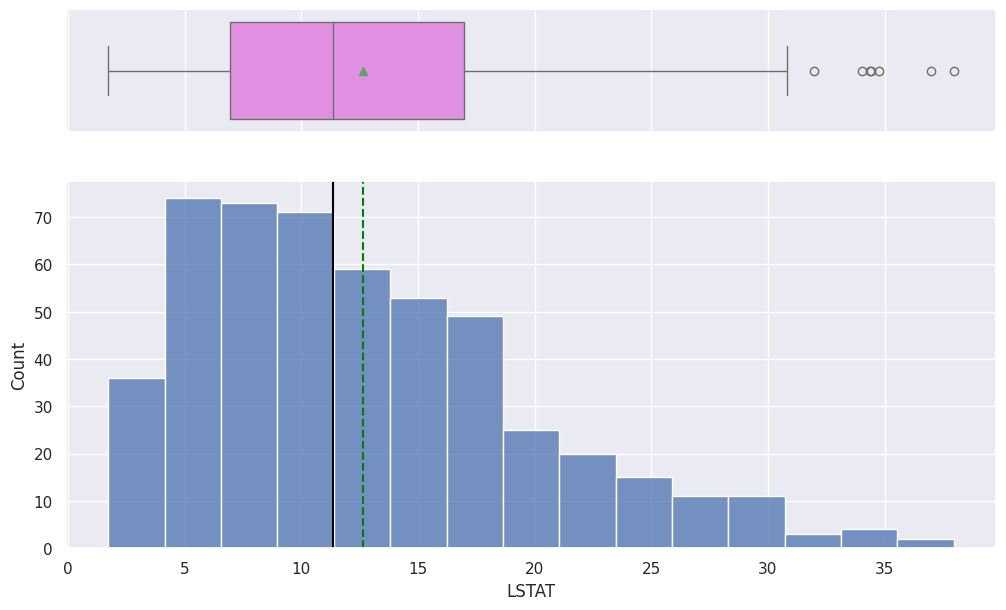

In [ ]:
histogram_boxplot(df, "LSTAT")

**Observation:**


*   Right skewed



**MEDV:**
Median value of owner-occupied homes in 1000 dollars

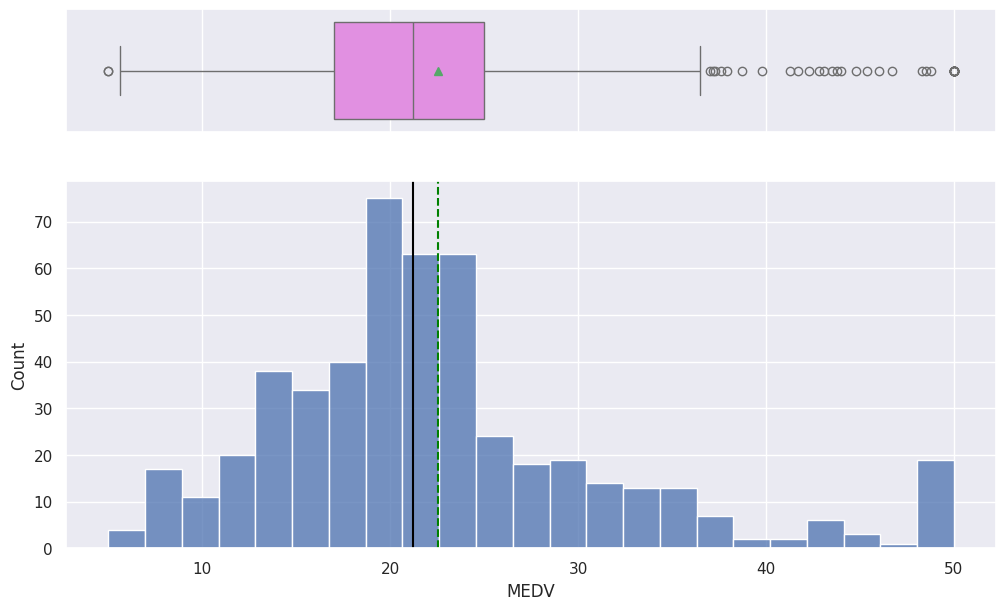

In [ ]:
histogram_boxplot(df, "MEDV")

**Observations**


*   It's slightly skewed, since this is our dependent variable we have to normalize it



CRIM        5.207652
ZN          2.219063
INDUS       0.294146
CHAS        3.395799
NOX         0.727144
RM          0.402415
AGE        -0.597186
DIS         1.008779
RAD         1.001833
TAX         0.667968
PTRATIO    -0.799945
LSTAT       0.903771
MEDV        1.104811
MEDV_log   -0.329341
dtype: float64


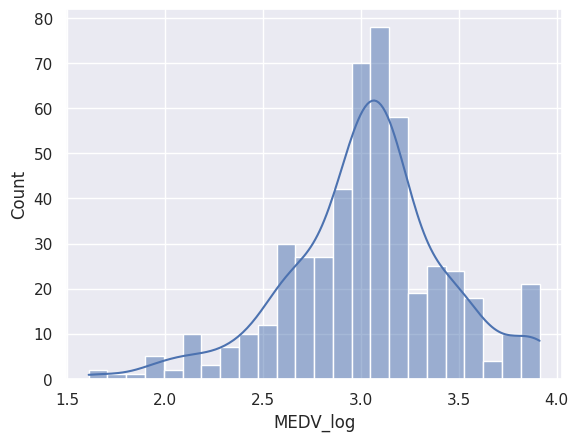

In [ ]:
#We apply the Log to reduce the skewness of the variable
df['MEDV_log'] = np.log(df['MEDV'])
sns.histplot(data = df, x = 'MEDV_log', kde = True)


skewness_values = df.apply(skew)

print(skewness_values)

After applying the Log to the label variable we were able to decrease the skewness of the data

**Bivariate Analysis**

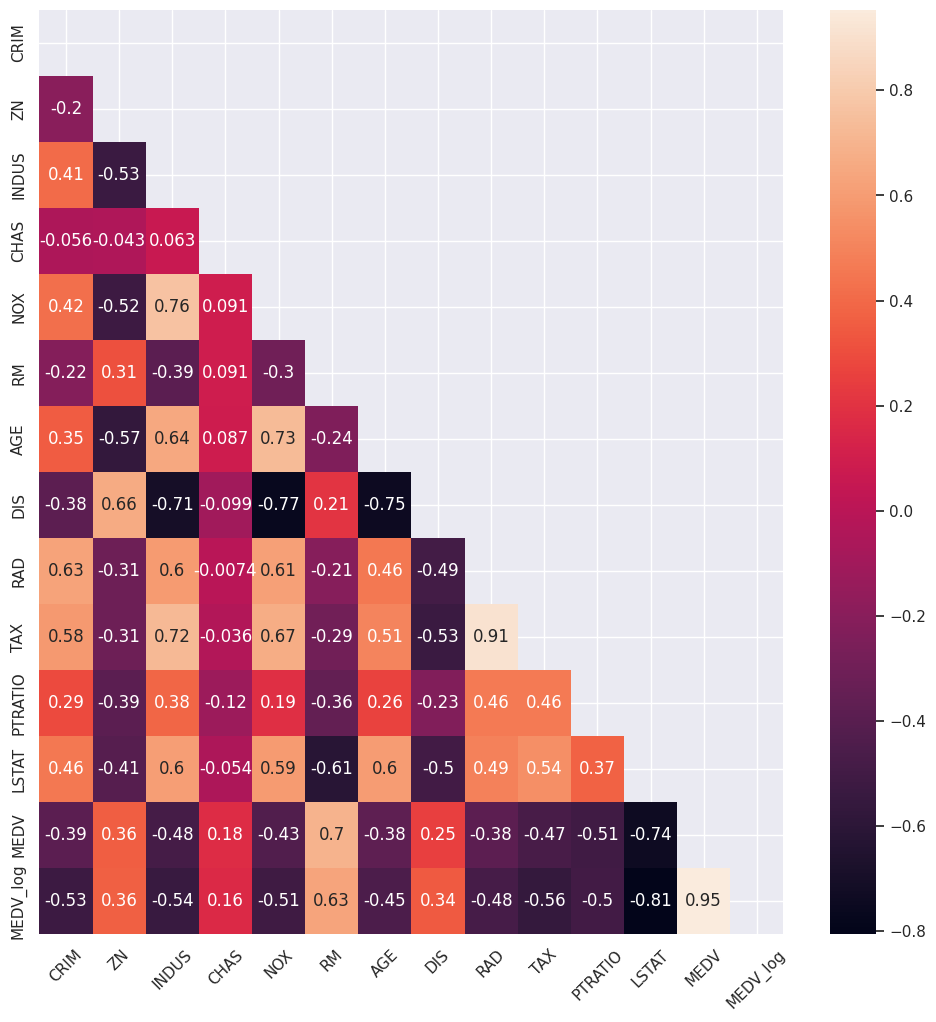

In [ ]:
fig = plt.figure(figsize = (12, 12))

mask = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, mask=mask);

plt.xticks(rotation = 45);

**Observations:**

**Correlation independent variables:**
- There is a positive correlation of 0.76 between NOX and INDUS
- There is a positive correlation of 0.73 between AGE and NOX
- There is a negative correlation of -0.71 between DIS and INDUS
- There is a negative correlation of -0.77 between DIS and NOX
- There is a negative correlation of -0.75 between DIS and AGE
- There is a positive correlation of 0.91 between TAX and RAD

**Correlation dependant variable:**

- The varibles with the strongest correlation to the dependant variable are RM with a positive correlation of 0.63 and LSTAT with a negative correlation of -0.81



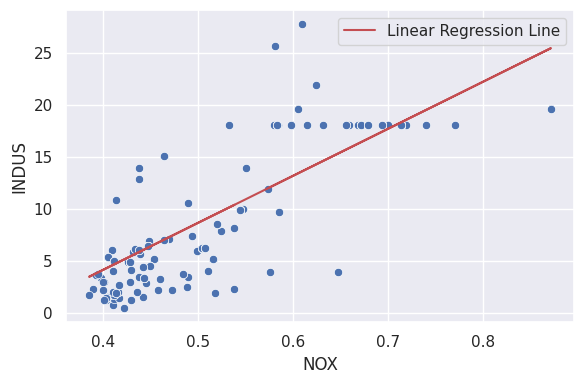

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='NOX', y='INDUS', data=df)
slope, intercept = np.polyfit(df['NOX'], df['INDUS'], 1)
plt.plot(df['NOX'], slope * df['NOX'] + intercept, color='r', label='Linear Regression Line')
plt.legend()
plt.tight_layout()



**Observations:**
- The NO2 seems to increase around industrial areas

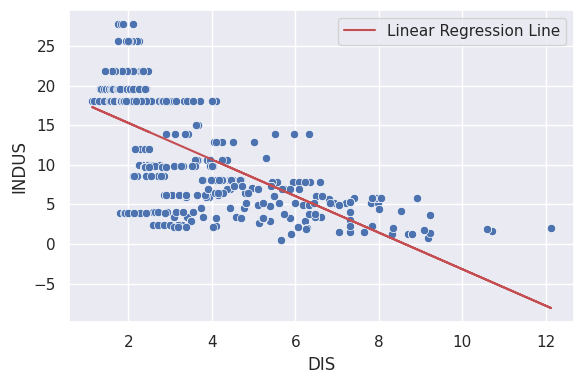

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='DIS', y='INDUS', data=df)
slope, intercept = np.polyfit(df['DIS'], df['INDUS'], 1)
plt.plot(df['DIS'], slope * df['DIS'] + intercept, color='r', label='Linear Regression Line')
plt.legend()
plt.tight_layout()

**Observations:**
- Clearly the industrial areas are closer to the Boston's employment centers

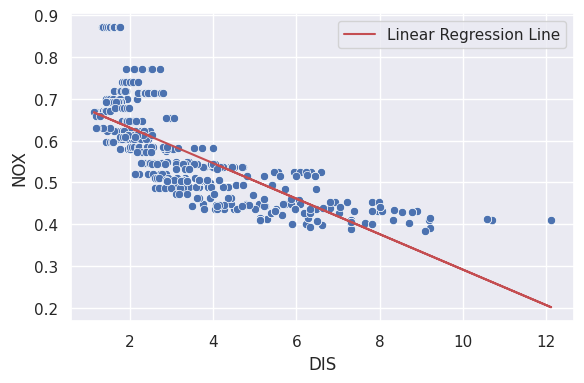

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='DIS', y='NOX', data=df)
slope, intercept = np.polyfit(df['DIS'], df['NOX'], 1)
plt.plot(df['DIS'], slope * df['DIS'] + intercept, color='r', label='Linear Regression Line')
plt.legend()
plt.tight_layout()

**Observations:**
- There is an decrease of Nitric Oxide concentration further away from the Boston's employment centers

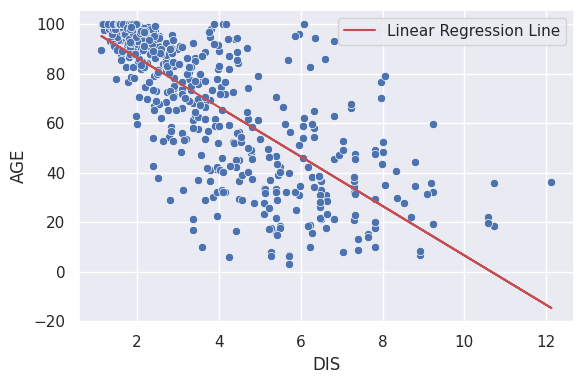

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='DIS', y='AGE', data=df)
slope, intercept = np.polyfit(df['DIS'], df['AGE'], 1)
plt.plot(df['DIS'], slope * df['DIS'] + intercept, color='r', label='Linear Regression Line')
plt.legend()
plt.tight_layout()


Observations:
- The older houses are closer to the Boston employment center, this means the further away from the employment centers we will find newer houses

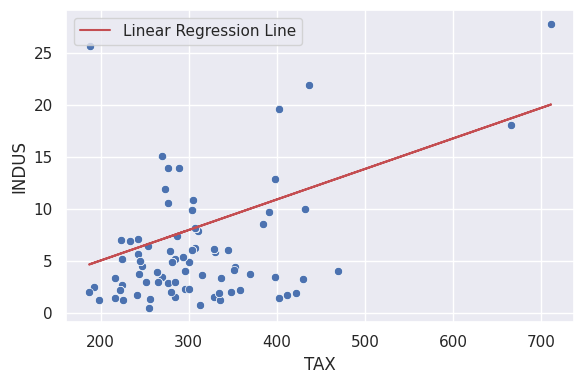

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='TAX', y='INDUS', data=df)
slope, intercept = np.polyfit(df['TAX'], df['INDUS'], 1)
plt.plot(df['TAX'], slope * df['TAX'] + intercept, color='r', label='Linear Regression Line')
plt.legend()
plt.tight_layout()


**Observations:**
- TAX seems to increase in proportion to the more industrialized areas

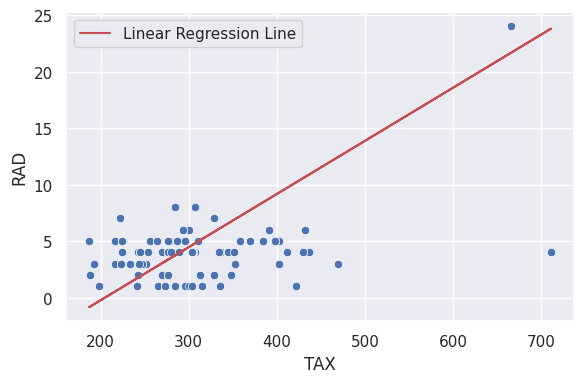

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='TAX', y='RAD', data=df)
slope, intercept = np.polyfit(df['TAX'], df['RAD'], 1)
plt.plot(df['TAX'], slope * df['TAX'] + intercept, color='r', label='Linear Regression Line')
plt.legend()
plt.tight_layout()

**Observations:**
- There is a high correlation between TAX and RAD but there seems to be no relationship, it might been due to the outliers

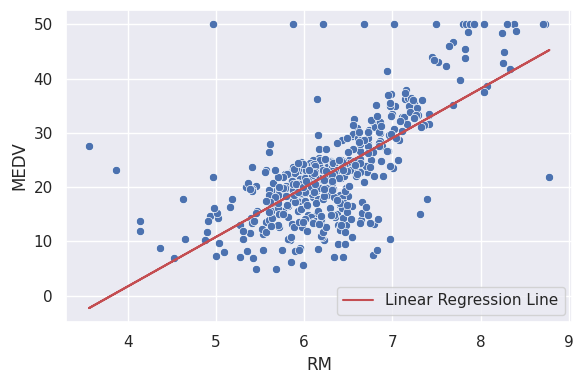

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='RM', y='MEDV', data=df)
slope, intercept = np.polyfit(df['RM'], df['MEDV'], 1)
plt.plot(df['RM'], slope * df['RM'] + intercept, color='r', label='Linear Regression Line')
plt.legend()
plt.tight_layout()

**Observations:**
- There is an increase in house price based on the average number of rooms per dwelling  

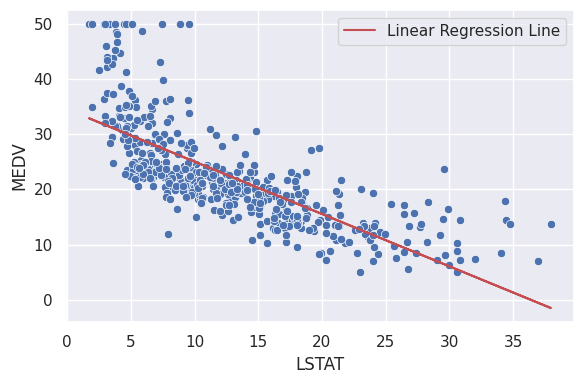

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='LSTAT', y='MEDV', data=df)
slope, intercept = np.polyfit(df['LSTAT'], df['MEDV'], 1)
plt.plot(df['LSTAT'], slope * df['LSTAT'] + intercept, color='r', label='Linear Regression Line')
plt.legend()
plt.tight_layout()

**Observations:**
- The house price seems to decrease with an increase in LSTAT. This is due to the lower status % of the population areas where the prices are lower

## Data Preprocessing

- Missing value treatment
- Log transformation of dependent variable if skewed
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**Missing value treatment**

In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

There are no missing values in the datasets.

**Data Preparation for Modeling**

- We want to forecast the MEDV_log.
- We will get the VIF scores to select the variables that will be removed from the model
- Scale the data the Standart Scaler




In [ ]:
from sklearn.preprocessing import StandardScaler

# Separating features and the target column
Features = df.drop(columns = {'MEDV', 'MEDV_log'})
y = df['MEDV_log']

# Creating an instance of the Standard Scaler
scaler = StandardScaler()

# Applying fit_transform on the training features data
features_scaled = scaler.fit_transform(Features)

# The above scaler returns the data in array format, below we are converting it back to pandas DataFrame
X = pd.DataFrame(features_scaled, index = Features.index, columns = Features.columns)

# Since CHAS is a categorical variable, we keep the same value we had before the Scaling
X['CHAS'] = df1['CHAS']

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,-0.419782,0.284830,-1.287909,0,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,-1.075562
1,-0.417339,-0.487722,-0.593381,0,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,-0.492439
2,-0.417342,-0.487722,-0.593381,0,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,-1.208727
3,-0.416750,-0.487722,-1.306878,0,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,-1.361517
4,-0.412482,-0.487722,-1.306878,0,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,-1.026501


In [ ]:
X = sm.add_constant(X)
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.30, random_state = 1)


**Check Multicollinearity**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

print(checking_vif(X_train))

    feature        VIF
0     const   1.109772
1      CRIM   1.924114
2        ZN   2.743574
3     INDUS   3.999538
4      CHAS   1.076564
5       NOX   4.396157
6        RM   1.860950
7       AGE   3.150170
8       DIS   4.355469
9       RAD   8.345247
10      TAX  10.191941
11  PTRATIO   1.943409
12    LSTAT   2.861881


In [ ]:
# Create the model after dropping TAX
X_train = X_train.drop(columns = 'TAX')
X = X.drop('TAX', axis=1)

# Check for VIF
print(checking_vif(X_train))

    feature       VIF
0     const  1.109681
1      CRIM  1.923159
2        ZN  2.483399
3     INDUS  3.270983
4      CHAS  1.050708
5       NOX  4.361847
6        RM  1.857918
7       AGE  3.149005
8       DIS  4.333734
9       RAD  2.942862
10  PTRATIO  1.909750
11    LSTAT  2.860251


**Observations:**

## Model Building - Linear Regression

Build the model

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    np.sqrt(mean_squared_error(y_observed_train,y_pred_train)),
                    np.sqrt(mean_squared_error(y_observed_test,y_pred_test)),
                ],
                "MAE": [
                    mean_absolute_error(y_observed_train,y_pred_train),
                    mean_absolute_error(y_observed_test,y_pred_test),
                ],

                "r2": [
                    r2_score(y_observed_train,y_pred_train),
                    r2_score(y_observed_test,y_pred_test),
                ],
            }
        )
    )

## Model Performance Check

1. How does the model is performing? Check using Rsquared, RSME, MAE, MAPE
2. Is there multicollinearity? Check using VIF
3. How does the model is performing after cross validation?

In [ ]:
# Splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30 , random_state = 1)

In [ ]:
# Create the model
model1 = sm.OLS(y_train, X_train).fit()

In [ ]:
# Get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     103.3
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          1.40e-101
Time:                        17:30:01   Log-Likelihood:                 76.596
No. Observations:                 354   AIC:                            -129.2
Df Residuals:                     342   BIC:                            -82.76
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0309      0.011    273.017      0.000       3.009       3.053
CRIM          -0.1098      0.015     -7.445      0.000      -0.139      -0.081
ZN             0.0235      0.016      1.425      0.155      -0.009       0.056
INDUS         -0.0028      0.019     -0.148      0.883      -0.040       0.035
CHAS           0.1196      0.039      3.082      0.002       0.043       0.196
NOX           -0.1227      0.022     -5.675      0.000      -0.165      -0.080
RM             0.0373      0.015      2.560      0.011       0.009       0.066
AGE            0.0086      0.019      0.461      0.645      -0.028       0.045
DIS           -0.1058      0.022     -4.894      0.000      -0.148      -0.063
RAD            0.0662      0.018      3.699      0.000       0.031       0.101
PTRATIO       -0.0978      0.015     -6.659      0.000      -0.127      -0.069
LSTAT         -0.2123      0.017    -12.134      0.000      -0.247      -0.178
==============================================================================
Omnibus:                       30.699   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.718
Skew:                           0.372   Prob(JB):                     6.62e-19
Kurtosis:                       5.263   Cond. No.                         8.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Checking model1 performance
model_pref(model1, X_train, X_test)


    Data      RMSE       MAE        r2
0  Train  0.194892  0.142894  0.768629
1   Test  0.198258  0.149346  0.771996


###  **Drop insignificant variables (variables with p-value > 0.05) from the above model and create the regression model again.**

In [ ]:
# Create the model after dropping columns 'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS' from df DataFrame
y = df['MEDV_log']

X = df.drop(['ZN','AGE','INDUS','MEDV','MEDV_log','TAX'], axis=1)

X = sm.add_constant(X)

# Splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30 , random_state = 1)

In [ ]:
# Create the model
model2 = sm.OLS(y_train, X_train).fit()

# Get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          2.61e-104
Time:                        17:32:40   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6494      0.242     19.242      0.000       4.174       5.125
CRIM          -0.0125      0.002     -7.349      0.000      -0.016      -0.009
CHAS           0.1198      0.039      3.093      0.002       0.044       0.196
NOX           -1.0562      0.168     -6.296      0.000      -1.386      -0.726
RM             0.0589      0.020      2.928      0.004       0.019       0.098
DIS           -0.0441      0.008     -5.561      0.000      -0.060      -0.028
RAD            0.0078      0.002      3.890      0.000       0.004       0.012
PTRATIO       -0.0485      0.006     -7.832      0.000      -0.061      -0.036
LSTAT         -0.0293      0.002    -12.949      0.000      -0.034      -0.025
==============================================================================
Omnibus:                       32.514   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.354
Skew:                           0.408   Prob(JB):                     1.07e-19
Kurtosis:                       5.293   Cond. No.                         690.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Checking model2 performance
model_pref(model2, X_train, X_test)

    Data      RMSE       MAE        r2
0  Train  0.195504  0.143686  0.767174
1   Test  0.198045  0.151284  0.772486


In [ ]:
from sklearn.linear_model import Ridge, Lasso

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Ridge Regression model
ridge = Ridge(alpha=0.5)  # alpha is the regularization parameter
ridge.fit(X_train, y_train)
ridge_train_score = ridge.score(X_train, y_train)
ridge_test_score = ridge.score(X_test, y_test)
print(f"Ridge Regression - Train set R^2: {ridge_train_score:.3f}, Test set R^2: {ridge_test_score:.3f}")

# Fit Lasso Regression model
lasso = Lasso(alpha=0.1)  # alpha is the regularization parameter
lasso.fit(X_train, y_train)
lasso_train_score = lasso.score(X_train, y_train)
lasso_test_score = lasso.score(X_test, y_test)
print(f"Lasso Regression - Train set R^2: {lasso_train_score:.3f}, Test set R^2: {lasso_test_score:.3f}")

Ridge Regression - Train set R^2: 0.777, Test set R^2: 0.746
Lasso Regression - Train set R^2: 0.705, Test set R^2: 0.701


In [ ]:
from sklearn.model_selection import GridSearchCV

# Ridge Regression with hyperparameter tuning
ridge = Ridge()
param_grid = {'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}
ridge_cv = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)
print(f"Best Ridge alpha: {ridge_cv.best_params_['alpha']}, Test set R^2: {ridge_cv.score(X_test, y_test):.3f}")

# Lasso Regression with hyperparameter tuning
lasso = Lasso()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}
lasso_cv = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
lasso_cv.fit(X_train, y_train)
print(f"Best Lasso alpha: {lasso_cv.best_params_['alpha']}, Test set R^2: {lasso_cv.score(X_test, y_test):.3f}")

Best Ridge alpha: 0.1, Test set R^2: 0.749
Best Lasso alpha: 0.001, Test set R^2: 0.744


### **Apply cross validation to improve the model and evaluate it using different evaluation metrics**

Let's check the performance of the model using the cross-validation technique from the scikit-learn library and see if the performance on the train and the test data is comparable to what we are getting after cross-validating the data.

In [ ]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10,
                             scoring = 'neg_mean_squared_error')


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.747 (+/- 0.168)
Mean Squared Error: 0.041 (+/- 0.018)


**Observation:**
- After applying cross-validation the model score is still the same. The model was already working at peak performance

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

### **Checking the below linear regression assumptions**

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

### **1. Check for mean residuals**

In [ ]:
residuals = model2.resid

np.mean(residuals)

-2.5303049047106675e-15

**Observation:**

- The mean of residuals is very close to 0. Hence, the corresponding assumption is satisfied.

### **2. Check for homoscedasticity**

- Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to be homoscedastic.

- Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

- We'll use `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [ ]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [ ]:
import statsmodels.stats.api as sms

from statsmodels.compat import lzip

name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train, X_train)

lzip(name, test)

[('F statistic', 1.02515174551264), ('p-value', 0.43159177554006917)]

**Observation:**

- Since p-value > 0.05, we accept the Null Hypothesis that the residuals are homoscedastic.

### **3. Linearity of variables**

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and the fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

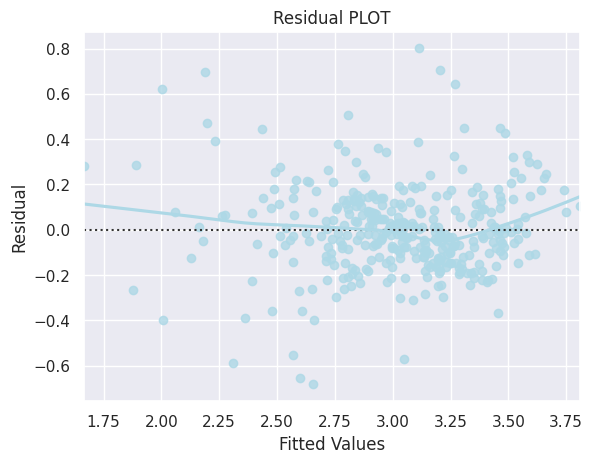

In [ ]:
# Predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color = "lightblue", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

Residuals are

### **4. Normality of error terms**

The residuals should be normally distributed.

Shapiro-Wilk Test:
Statistic: 0.9635363221168518, p-value: 1.0045714304851572e-07
Kolmogorov-Smirnov Test:
Statistic: 0.34786047698442557, p-value: 8.773657124620442e-39


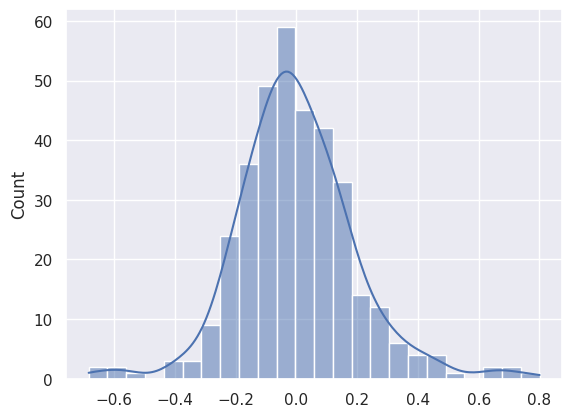

In [ ]:
# Plot histogram of residuals
sns.histplot(residuals, kde = True)
from scipy.stats import shapiro, kstest

# Shapiro-Wilk test
stat, p = shapiro(residuals)
print('Shapiro-Wilk Test:')
print(f'Statistic: {stat}, p-value: {p}')

# Kolmogorov-Smirnov test
stat, p = kstest(residuals, 'norm')
print('Kolmogorov-Smirnov Test:')
print(f'Statistic: {stat}, p-value: {p}')


Acording to the tests done on the residuals of the model doesn't quite follow a normal distribution.

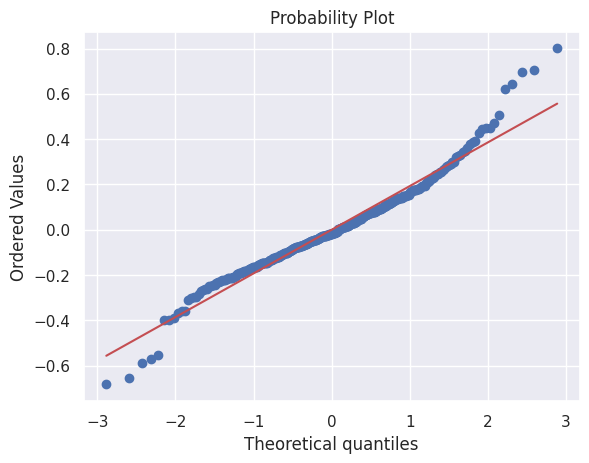

In [ ]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

## Final Model

### Get model Coefficients
Put model coefficients in a pandas dataframe with column 'Feature' having all the features and column 'Coefs' with all the corresponding Coefs.



In [ ]:
coef = model2.params

pd.DataFrame({'Feature' : coef.index, 'Coefs' : coef.values})

# Let us write the equation of the fit

Equation = "log (Price) = "

print(Equation, end = '\t')

for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

log (Price) = 	( 4.649385823266634 ) *  const + ( -0.012500455079103785 ) *  CRIM + ( 0.11977319077019677 ) *  CHAS + ( -1.056225351668325 ) *  NOX + ( 0.05890657510928028 ) *  RM + ( -0.04406889079940611 ) *  DIS + ( 0.007848474606243312 ) *  RAD + ( -0.048503620794998564 ) *  PTRATIO + ( -0.029277040479796717 ) *  LSTAT + 

The final model that we build had a R2 of 0.76, using the features (CRIM, CHAS, NOX, RM, LSTAT, DIS, RAD and PTRATIO) and the label MEDV_log

## Actionable Insights and Recommendations

**Conclusions:**
-  This model explains 76% of the variation in the data with an R-Squared of 0.74
- This model can be used to predict the housing prices in Boston
- Features that have the most importance and impact on prediction the housing prices are:
  1.   CRIM: Per capita crime rate by town - The lower the crime rate the higher the housing prices.
  2.   CHAS: Charles River dummy variable - Being on the Charles river results in higher prices
  3.   NOX: Nitric Oxide concentration - Higher Nitric Oxide concentrations resulted in higher prices
  4.   RM: The average number of rooms per dwelling - The higher average number of rooms the higher the prices of housing
  5.   DIS: Weighted distances to five Boston employment centers - The shorter the distance to the employment centers the higher the housing prices
  6.   LSTAT: % lower status of the population - The % lower status population tend to live in houses of lower prices

**Recommendations:**
- Reducing crime rates in the city could contribute to the increase of property value. The model identified per capita crime rate (CRIM) as a significant negative factor affecting housing prices.
- Address environmental concerns: Nitric oxide concentration (NOX), which is an indicator of air pollution, was found to have a negative impact on housing prices. Efforts should be made to reduce emissions and improve air quality in residential areas.
- Develop larger homes: The average number of rooms (RM) in a dwelling had a positive effect on housing prices. People interested in selling or constructing houses should consider homes with more rooms to cater to the demand for larger living spaces.
- Prioritize areas closer to employment centers: The model showed that the distance to employment centers (DIS) negatively influenced housing prices. Prioritizing the development of residential areas closer to major employment hubs or improving transportation connectivity could increase property values.
Enhance socioeconomic conditions: The percentage of lower status population (LSTAT) was negatively correlated with housing prices. Implementing measures to improve the socioeconomic status and living conditions in neighborhoods could contribute to higher property values.



___